In [2]:
# importing libraries
import numpy as np
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
from glob import glob
import os

c:\Users\TR66\anaconda3_\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
audio_path = ".\librosa"


audio_files = glob(audio_path + '\*.wav')
print(audio_files[0])


.\librosa\ameh opus-4 170bpm to 150 bpm Bmin.wav


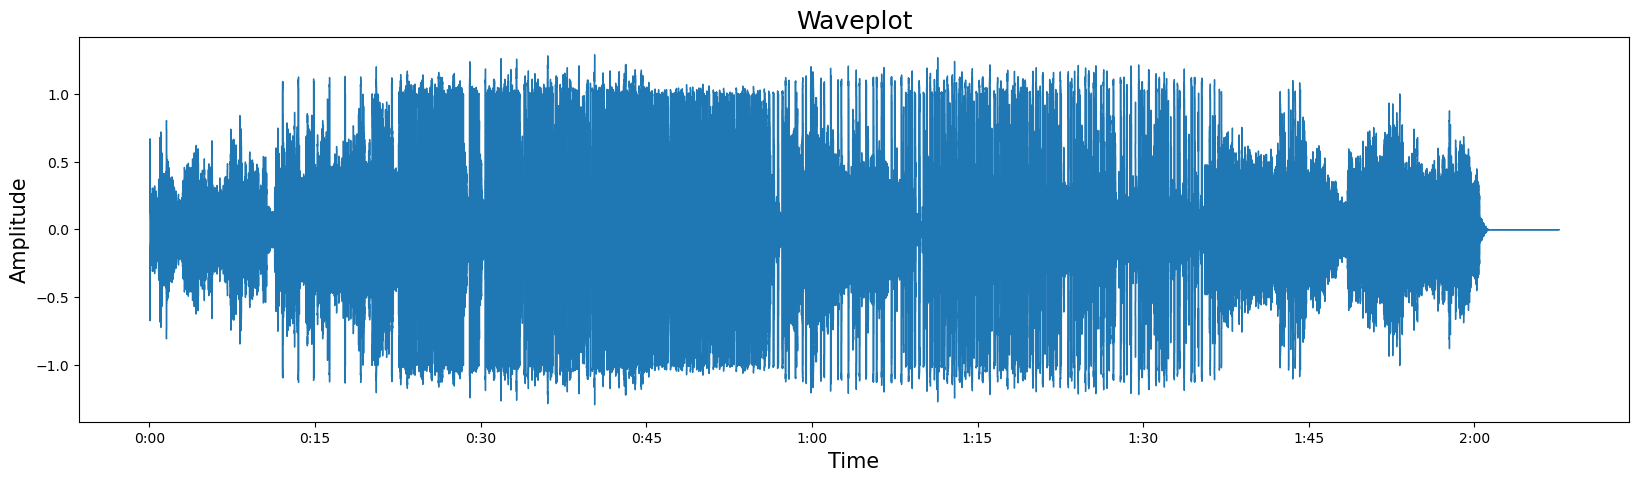

In [4]:
# reading audio files
# for i in range (len(audio_files)):

audio = audio_files[0]
audio, sfreq = lr.load(audio)
time = np.arange(0,len(audio)) / sfreq
plt.figure(figsize=(20, 5))
librosa.display.waveshow(audio, sr=sfreq)

plt.title('Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))
plt.show()


In [5]:
# # plotting audio file
# fig, ax = plt.subplots()
# ax.plot(time,audio)
# ax.set(xlabel = 'Time(s)', ylabel = 'Amplitude')
# # print(sfreq)

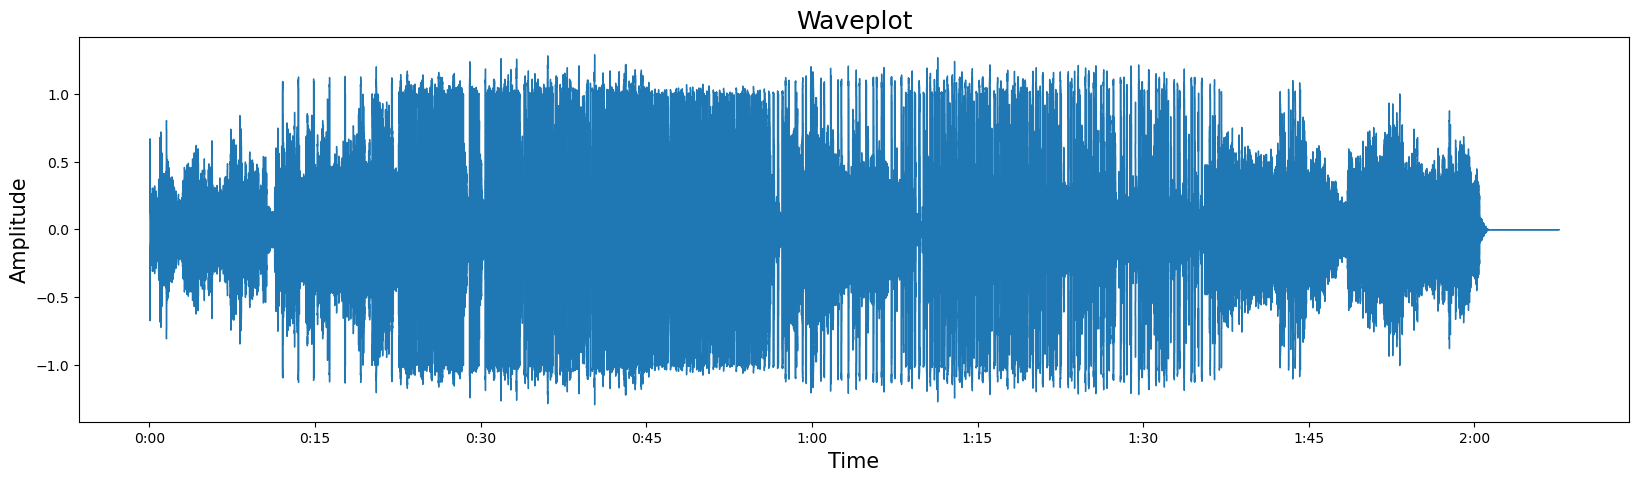

In [6]:
# plotting audio file
plt.figure(figsize=(20, 5))
librosa.display.waveshow(audio, sr=sfreq)

plt.title('Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))
plt.show()

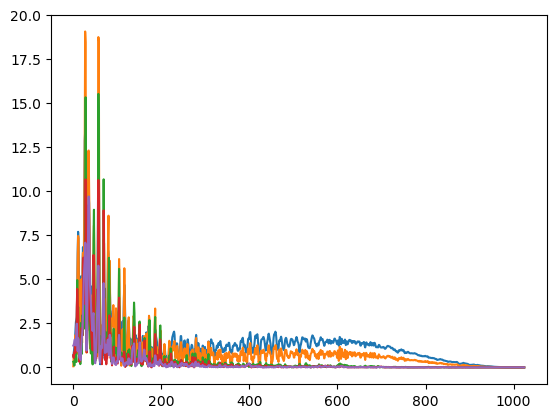

In [7]:
# fft 
n_fft = 2048
ft = np.abs(librosa.stft(audio[:n_fft], hop_length = 512))
plt.plot(ft)

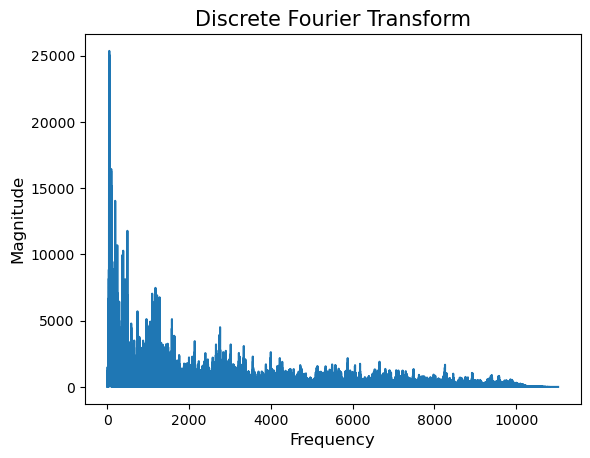

In [8]:
# Discrete Fourier Transform of the audio file
fft_analysis = np.fft.fft(audio)
magnitude = np.abs(fft_analysis)
frequency = np.linspace(0,sfreq,len(magnitude))

left_mag = magnitude[:len(magnitude)//2]
left_freq = frequency[:len(frequency)//2]

plt.plot(left_freq,left_mag)
plt.title('Discrete Fourier Transform',fontdict=dict(size=15))
plt.xlabel('Frequency',fontdict=dict(size=12))
plt.ylabel('Magnitude',fontdict=dict(size=12))
plt.show()

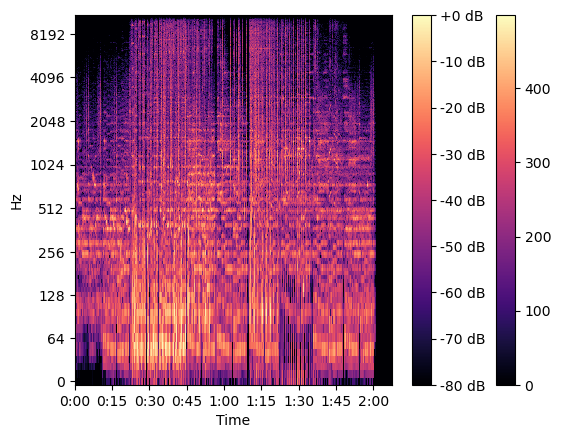

In [9]:
# spectrogram of the audio file
hop_length = 512
ft = np.abs(librosa.stft(audio, n_fft=n_fft,  hop_length= 512))
librosa.display.specshow(ft, sr=sfreq, x_axis='time', y_axis='linear');
plt.colorbar();
ft_dB = librosa.amplitude_to_db(ft, ref=np.max)
librosa.display.specshow(ft_dB, sr=sfreq, hop_length= 512 , x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

C:\Users\TR66\AppData\Local\Temp\ipykernel_6064\697520857.py:6: FutureWarning: Pass y=[0.03502067 0.0550785  0.04112595 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stft_seg = librosa.feature.melspectrogram(audio,hop_length = hop_length,n_fft = n_fft)


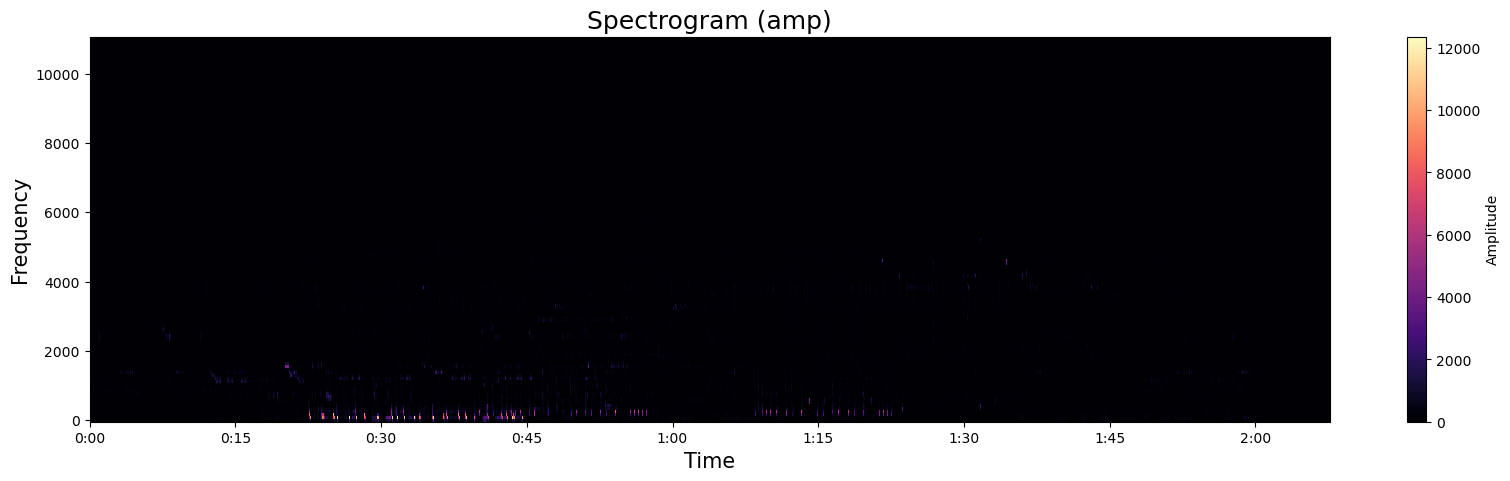

In [10]:
#  short term fourier transform

n_fft = 2048 
hop_length = 512

stft_seg = librosa.feature.melspectrogram(audio,hop_length = hop_length,n_fft = n_fft)
spectogram = np.abs(stft_seg)
# plot the figure
plt.figure(figsize=(20,5))
librosa.display.specshow(spectogram,sr = sfreq, x_axis='time' , y_axis = 'hz', hop_length = hop_length)
plt.colorbar(label='Amplitude')
plt.title('Spectrogram (amp)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()
# Figure shows amplitude of frequencies in a spectrogram

Performing short term fourier transform after converting amplitudes to decibels and plotting a spectrogram

C:\Users\TR66\AppData\Local\Temp\ipykernel_6064\3993345184.py:6: FutureWarning: Pass y=[0.03502067 0.0550785  0.04112595 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stft_seg = librosa.feature.melspectrogram(audio,hop_length = hop_length,n_fft = n_fft)


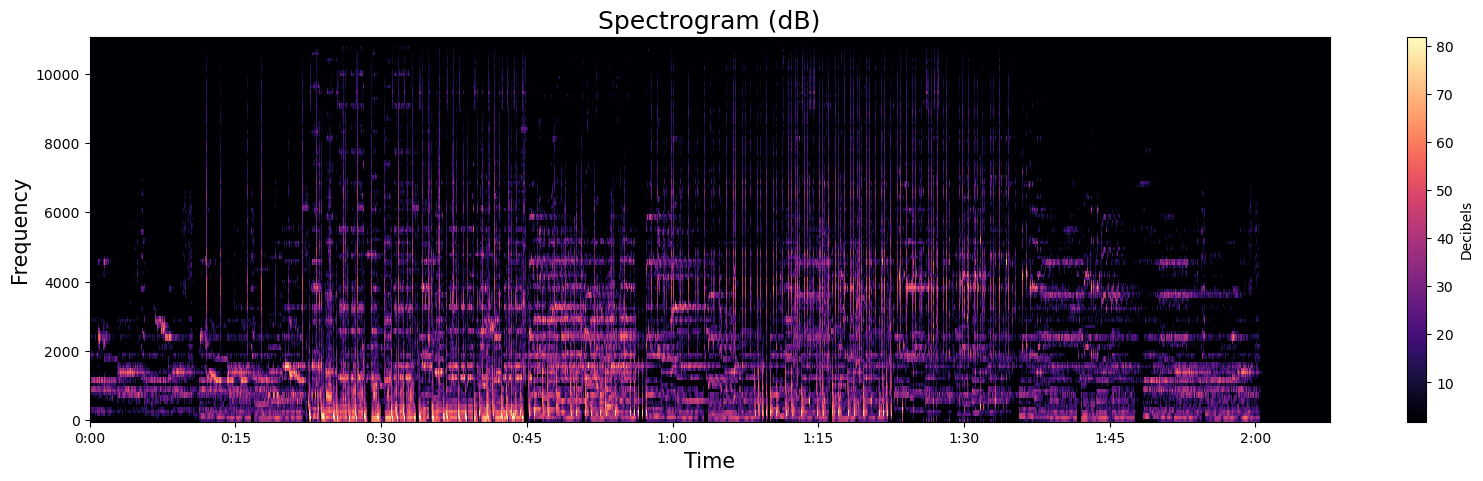

In [11]:
#  short term fourier transform

n_fft = 2048 
hop_length = 512

stft_seg = librosa.feature.melspectrogram(audio,hop_length = hop_length,n_fft = n_fft)
spectogram = np.abs(stft_seg)

# convert amplitude to decibel
log_spectogram = librosa.amplitude_to_db(spectogram)

# plot the figure
plt.figure(figsize=(20,5))

# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(log_spectogram, sr=sfreq, x_axis='time', y_axis='hz', hop_length=hop_length, cmap='magma')
plt.colorbar(label='Decibels')
plt.title('Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

The mel spectrogram of the audio file


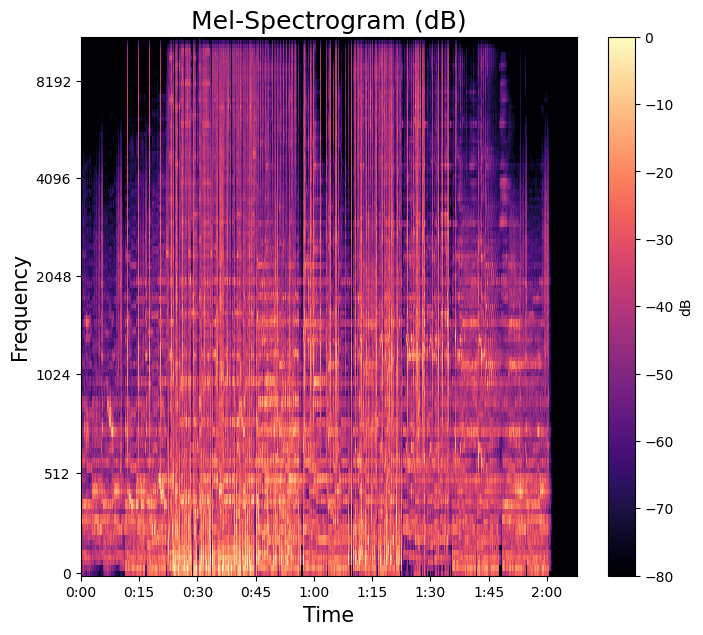

In [12]:
mel_signal = librosa.feature.melspectrogram(y=audio, sr=sfreq, hop_length=hop_length, 
 n_fft=n_fft)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(8, 7))
librosa.display.specshow(power_to_db, sr=sfreq, x_axis='time', y_axis='mel', cmap='magma', 
 hop_length=hop_length)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

